In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers, Model
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, SimpleRNN, TimeDistributed, LSTM, GRU, Bidirectional
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, ReduceLROnPlateau

from IPython.display import Image

import matplotlib.pyplot as plt
import PIL
import numpy as np
import pandas as pd

# Simple Neural Network

In [2]:
# x1 + x2 - x3
Data_x = [
    [ 1.0, 0.8, 0.4 ],
    [ 1.0, 0.8, 0.7 ],
    [ 0.3, 0.1, 0.2 ]
]

Data_y = [
    1.4,
    1.1,
    0.2
]

In [3]:
nFeatures = 3

### Network architecture & Parameters?

In [4]:
model = Sequential()
# RNN. 현재 RNN은 return_sequences (모든 x time-step에 대하여 output을 냄)
model.add(Dense(1, activation='linear', input_shape=( nFeatures, )))

In [5]:
model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=Adam(learning_rate=0.01), metrics=['mse'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


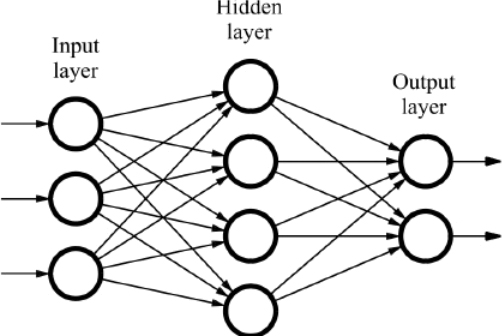

In [44]:
Image('images/neural.jpg')

In [10]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(3, 1) dtype=float32, numpy=
 array([[0.25179148],
        [0.34107816],
        [0.93086255]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

In [11]:
model.predict(Data_x)

1/1 [==============================] - 1s 567ms/step


array([[0.89699906],
       [1.1762578 ],
       [0.2958178 ]], dtype=float32)

### model fine-tunning

In [12]:
model.fit(Data_x, Data_y, epochs=50)

Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 0.0893 - mse: 0.0893
Epoch 2/50
1/1 [==============================] - 0s 23ms/step - loss: 0.0822 - mse: 0.0822
Epoch 3/50
1/1 [==============================] - 0s 16ms/step - loss: 0.0769 - mse: 0.0769
Epoch 4/50
1/1 [==============================] - 0s 13ms/step - loss: 0.0732 - mse: 0.0732
Epoch 5/50
1/1 [==============================] - 0s 12ms/step - loss: 0.0711 - mse: 0.0711
Epoch 6/50
1/1 [==============================] - 0s 15ms/step - loss: 0.0702 - mse: 0.0702
Epoch 7/50
1/1 [==============================] - 0s 13ms/step - loss: 0.0701 - mse: 0.0701
Epoch 8/50
1/1 [==============================] - 0s 15ms/step - loss: 0.0702 - mse: 0.0702
Epoch 9/50
1/1 [==============================] - 0s 12ms/step - loss: 0.0704 - mse: 0.0704
Epoch 10/50
1/1 [==============================] - 0s 18ms/step - loss: 0.0702 - mse: 0.0702
Epoch 11/50
1/1 [==============================] - 0s 15ms/step - loss: 0.0698 - 

In [13]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(3, 1) dtype=float32, numpy=
 array([[0.457997  ],
        [0.60251856],
        [0.6556614 ]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([-0.07937696], dtype=float32)>]

In [14]:
model.predict(Data_x)

1/1 [==============================] - 0s 82ms/step


array([[1.1228995 ],
       [1.319598  ],
       [0.24940631]], dtype=float32)

In [15]:
Data_y

[1.4, 1.1, 0.2]

## Deep & Wide model, parameters?

In [16]:
model = Sequential()
# RNN. 현재 RNN은 return_sequences (모든 x time-step에 대하여 output을 냄)
model.add(Dense(30, activation='linear', input_shape=( nFeatures, )))
model.add(Dense(20, activation='linear'))
model.add(Dense(53, activation='linear'))
model.add(Dense(23, activation='linear'))
model.add(Dense(1, activation='linear'))

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 30)                120       
                                                                 
 dense_2 (Dense)             (None, 20)                620       
                                                                 
 dense_3 (Dense)             (None, 53)                1113      
                                                                 
 dense_4 (Dense)             (None, 23)                1242      
                                                                 
 dense_5 (Dense)             (None, 1)                 24        
                                                                 
Total params: 3,119
Trainable params: 3,119
Non-trainable params: 0
_________________________________________________________________


<br><br><br><br><br><br><br>
# Recurrent Neural Network

# Simple time series data (time = 6, nFeatures = 1)
return_sequences = False
** Many to One **

In [18]:
Data_x = [
    [0.0, 0.0, 0.0, 0.5, 0.5, 1.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
]

Data_y = [ 
    [1],
    [0]
]

In [19]:
nFeatures = 1
TimeRange = 6

### Model architecture & parameters? return_sequences?

In [20]:
model = Sequential()
# RNN. 현재 RNN은 return_sequences (모든 x time-step에 대하여 output을 냄)
model.add(SimpleRNN(1, activation='linear', return_sequences = False, input_shape=( TimeRange, nFeatures,  )))

In [21]:
model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=Adam(learning_rate=0.01), metrics=['mse'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


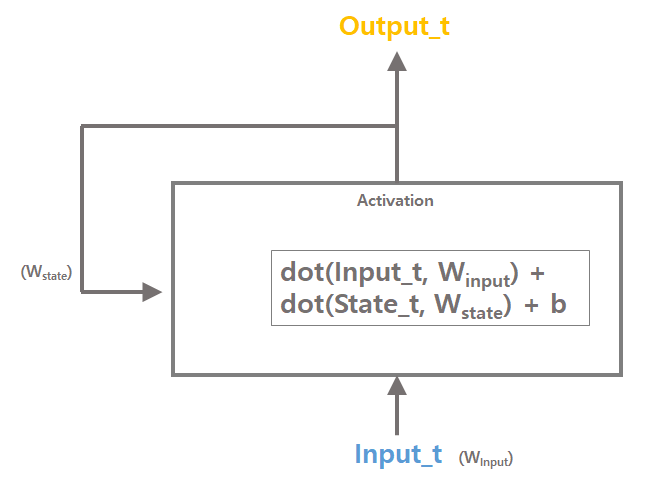

In [117]:
Image('images/rnn.png', width=500)

In [22]:
model.weights

[<tf.Variable 'simple_rnn/simple_rnn_cell/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[-0.26156902]], dtype=float32)>,
 <tf.Variable 'simple_rnn/simple_rnn_cell/recurrent_kernel:0' shape=(1, 1) dtype=float32, numpy=array([[-1.]], dtype=float32)>,
 <tf.Variable 'simple_rnn/simple_rnn_cell/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

In [23]:
model.predict(Data_x)

1/1 [==============================] - 0s 328ms/step


array([[-0.26156902],
       [ 0.        ]], dtype=float32)

### Fine tunning

In [24]:
model.fit(Data_x, Data_y, epochs=30)

Epoch 1/30
1/1 [==============================] - 2s 2s/step - loss: 0.7958 - mse: 0.7958
Epoch 2/30
1/1 [==============================] - 0s 13ms/step - loss: 0.7817 - mse: 0.7817
Epoch 3/30
1/1 [==============================] - 0s 18ms/step - loss: 0.7673 - mse: 0.7673
Epoch 4/30
1/1 [==============================] - 0s 12ms/step - loss: 0.7526 - mse: 0.7526
Epoch 5/30
1/1 [==============================] - 0s 16ms/step - loss: 0.7377 - mse: 0.7377
Epoch 6/30
1/1 [==============================] - 0s 12ms/step - loss: 0.7224 - mse: 0.7224
Epoch 7/30
1/1 [==============================] - 0s 17ms/step - loss: 0.7070 - mse: 0.7070
Epoch 8/30
1/1 [==============================] - 0s 19ms/step - loss: 0.6913 - mse: 0.6913
Epoch 9/30
1/1 [==============================] - 0s 17ms/step - loss: 0.6755 - mse: 0.6755
Epoch 10/30
1/1 [==============================] - 0s 16ms/step - loss: 0.6595 - mse: 0.6595
Epoch 11/30
1/1 [==============================] - 0s 16ms/step - loss: 0.6434 - 

In [25]:
model.weights

[<tf.Variable 'simple_rnn/simple_rnn_cell/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.02473889]], dtype=float32)>,
 <tf.Variable 'simple_rnn/simple_rnn_cell/recurrent_kernel:0' shape=(1, 1) dtype=float32, numpy=array([[-0.6928969]], dtype=float32)>,
 <tf.Variable 'simple_rnn/simple_rnn_cell/bias:0' shape=(1,) dtype=float32, numpy=array([0.30408722], dtype=float32)>]

In [26]:
model.predict(Data_x)

1/1 [==============================] - 0s 127ms/step


array([[0.18185383],
       [0.15974705]], dtype=float32)

# Simple time series data (time = 6, nFeatures = 1)
return_sequences=True
** Many to Many **

In [27]:
Data_x = [
    [0.0, 0.0, 0.0, 0.5, 0.8, 1.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
]

Data_y = [ 
    [0.0, 0.0, 0.0, 1.0, 1.0, 1.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
]

In [28]:
nFeatures = 1
TimeRange = 6

In [29]:
model = Sequential()
# RNN. 현재 RNN은 return_sequences (모든 x time-step에 대하여 output을 냄)
model.add(SimpleRNN(1, activation='linear', return_sequences = True, input_shape=( TimeRange, nFeatures,  )))

In [30]:
model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=Adam(learning_rate=0.1), metrics=['mse'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 6, 1)              3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.weights

[<tf.Variable 'simple_rnn_1/simple_rnn_cell_1/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.10506845]], dtype=float32)>,
 <tf.Variable 'simple_rnn_1/simple_rnn_cell_1/recurrent_kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.]], dtype=float32)>,
 <tf.Variable 'simple_rnn_1/simple_rnn_cell_1/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

In [32]:
model.predict(Data_x)

1/1 [==============================] - 0s 323ms/step


array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.05253422],
        [0.13658899],
        [0.24165744]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]]], dtype=float32)

### fine tunning

In [33]:
model.fit(Data_x, Data_y, epochs=30)

Epoch 1/30
1/1 [==============================] - 2s 2s/step - loss: 0.1849 - mse: 0.1849
Epoch 2/30
1/1 [==============================] - 0s 15ms/step - loss: 0.1492 - mse: 0.1492
Epoch 3/30
1/1 [==============================] - 0s 16ms/step - loss: 0.1017 - mse: 0.1017
Epoch 4/30
1/1 [==============================] - 0s 15ms/step - loss: 0.0667 - mse: 0.0667
Epoch 5/30
1/1 [==============================] - 0s 16ms/step - loss: 0.0672 - mse: 0.0672
Epoch 6/30
1/1 [==============================] - 0s 18ms/step - loss: 0.0679 - mse: 0.0679
Epoch 7/30
1/1 [==============================] - 0s 18ms/step - loss: 0.0605 - mse: 0.0605
Epoch 8/30
1/1 [==============================] - 0s 14ms/step - loss: 0.0505 - mse: 0.0505
Epoch 9/30
1/1 [==============================] - 0s 14ms/step - loss: 0.0438 - mse: 0.0438
Epoch 10/30
1/1 [==============================] - 0s 13ms/step - loss: 0.0422 - mse: 0.0422
Epoch 11/30
1/1 [==============================] - 0s 11ms/step - loss: 0.0437 - 

In [34]:
model.weights

[<tf.Variable 'simple_rnn_1/simple_rnn_cell_1/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.0652875]], dtype=float32)>,
 <tf.Variable 'simple_rnn_1/simple_rnn_cell_1/recurrent_kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.04077397]], dtype=float32)>,
 <tf.Variable 'simple_rnn_1/simple_rnn_cell_1/bias:0' shape=(1,) dtype=float32, numpy=array([0.05187044], dtype=float32)>]

In [35]:
model.predict(Data_x)

1/1 [==============================] - 0s 123ms/step


array([[[0.05187044],
        [0.0539854 ],
        [0.05407164],
        [0.58671886],
        [0.9280233 ],
        [1.1549971 ]],

       [[0.05187044],
        [0.0539854 ],
        [0.05407164],
        [0.05407515],
        [0.05407529],
        [0.0540753 ]]], dtype=float32)

# Deep & Wide model parameters?

In [36]:
model = Sequential()
# RNN. 현재 RNN은 return_sequences=False (마지막 x time-step에 대해서만 output을 냄)
model.add(SimpleRNN(5, activation='linear', return_sequences = False, input_shape=( TimeRange, nFeatures,  )))
model.add(Dense(5, activation='linear'))
model.add(Dense(1, activation='linear'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 5)                 35        
                                                                 
 dense_6 (Dense)             (None, 5)                 30        
                                                                 
 dense_7 (Dense)             (None, 1)                 6         
                                                                 
Total params: 71
Trainable params: 71
Non-trainable params: 0
_________________________________________________________________


In [37]:
model = Sequential()
# RNN. 현재 RNN은 return_sequences (모든 x time-step에 대하여 output을 냄)
model.add(SimpleRNN(5, activation='linear', return_sequences = True, input_shape=( TimeRange, nFeatures,  )))
model.add(SimpleRNN(5, activation='linear', return_sequences = False))
model.add(Dense(1, activation='linear'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 6, 5)              35        
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 5)                 55        
                                                                 
 dense_8 (Dense)             (None, 1)                 6         
                                                                 
Total params: 96
Trainable params: 96
Non-trainable params: 0
_________________________________________________________________


<br><br><br><br><br><br><br><br><br>
# Time distributed
non-RNN layer에게 모든 Time에 대하여 output을 전달하고 싶을 때?

In [38]:
Data_x = [
    [0.0, 0.0, 0.0, 0.5, 0.8, 1.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
]

Data_y = [ 
    [0.0, 0.0, 0.0, 1.0, 1.0, 1.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
]

In [39]:
model = Sequential()
# RNN. 현재 RNN은 return_sequences=False (마지막 x time-step에 대해서만 output을 냄)
model.add(SimpleRNN(5, activation='linear', return_sequences = True, input_shape=( TimeRange, nFeatures,  )))
model.add(Dense(1, activation='linear'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_5 (SimpleRNN)    (None, 6, 5)              35        
                                                                 
 dense_9 (Dense)             (None, 6, 1)              6         
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.predict(Data_x)

1/1 [==============================] - 1s 592ms/step


array([[[ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [-0.15491538],
        [-0.6223662 ],
        [-1.3274128 ]],

       [[ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ]]], dtype=float32)

**Final output layer의 unit 수가 1임에도 불구하고 Multiple output**

In [41]:
help(TimeDistributed)

Help on class TimeDistributed in module keras.layers.rnn.time_distributed:

class TimeDistributed(keras.layers.rnn.base_wrapper.Wrapper)
 |  TimeDistributed(*args, **kwargs)
 |  
 |  This wrapper allows to apply a layer to every temporal slice of an input.
 |  
 |  Every input should be at least 3D, and the dimension of index one of the
 |  first input will be considered to be the temporal dimension.
 |  
 |  Consider a batch of 32 video samples, where each sample is a 128x128 RGB image
 |  with `channels_last` data format, across 10 timesteps.
 |  The batch input shape is `(32, 10, 128, 128, 3)`.
 |  
 |  You can then use `TimeDistributed` to apply the same `Conv2D` layer to each
 |  of the 10 timesteps, independently:
 |  
 |  >>> inputs = tf.keras.Input(shape=(10, 128, 128, 3))
 |  >>> conv_2d_layer = tf.keras.layers.Conv2D(64, (3, 3))
 |  >>> outputs = tf.keras.layers.TimeDistributed(conv_2d_layer)(inputs)
 |  >>> outputs.shape
 |  TensorShape([None, 10, 126, 126, 64])
 |  
 |  Bec

In [42]:
model = Sequential()
# RNN. 현재 RNN은 return_sequences=False (마지막 x time-step에 대해서만 output을 냄)
model.add(SimpleRNN(5, activation='linear', return_sequences = True, input_shape=( TimeRange, nFeatures,  )))
model.add(TimeDistributed(Dense(1, activation='linear')))

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_6 (SimpleRNN)    (None, 6, 5)              35        
                                                                 
 time_distributed (TimeDistr  (None, 6, 1)             6         
 ibuted)                                                         
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.predict(Data_x)

1/1 [==============================] - 0s 332ms/step


array([[[ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.06632701],
        [-0.27658868],
        [-0.805984  ]],

       [[ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ]]], dtype=float32)

In [44]:
model = Sequential()
# RNN. 현재 RNN은 return_sequences=False (마지막 x time-step에 대해서만 output을 냄)
model.add(SimpleRNN(5, activation='linear', return_sequences = True, input_shape=( TimeRange, nFeatures,  )))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_7 (SimpleRNN)    (None, 6, 5)              35        
                                                                 
 dense_11 (Dense)            (None, 6, 1)              6         
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=Adam(learning_rate=0.01), metrics=['mse'])
model.fit(Data_x, Data_y, epochs=10)

Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 0.1276 - mse: 0.1276
Epoch 2/10
1/1 [==============================] - 0s 21ms/step - loss: 0.1097 - mse: 0.1097
Epoch 3/10
1/1 [==============================] - 0s 24ms/step - loss: 0.0967 - mse: 0.0967
Epoch 4/10
1/1 [==============================] - 0s 29ms/step - loss: 0.0876 - mse: 0.0876
Epoch 5/10
1/1 [==============================] - 0s 23ms/step - loss: 0.0810 - mse: 0.0810
Epoch 6/10
1/1 [==============================] - 0s 21ms/step - loss: 0.0755 - mse: 0.0755
Epoch 7/10
1/1 [==============================] - 0s 20ms/step - loss: 0.0702 - mse: 0.0702
Epoch 8/10
1/1 [==============================] - 0s 22ms/step - loss: 0.0650 - mse: 0.0650
Epoch 9/10
1/1 [==============================] - 0s 23ms/step - loss: 0.0599 - mse: 0.0599
Epoch 10/10
1/1 [==============================] - 0s 20ms/step - loss: 0.0550 - mse: 0.0550


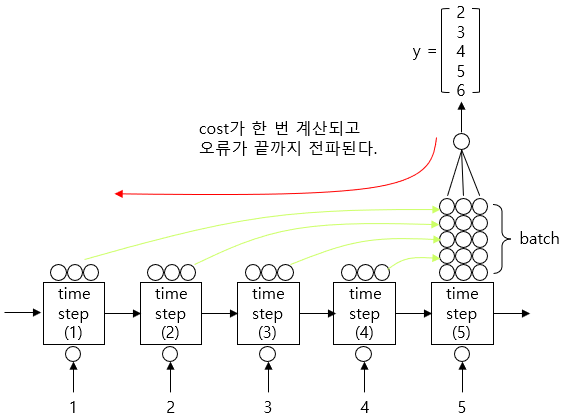

In [189]:
# https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=chunjein&logNo=221589624838
Image('images/withoutTD.gif', width=500)

In [46]:
model1 = Sequential()
# RNN. 현재 RNN은 return_sequences=False (마지막 x time-step에 대해서만 output을 냄)
model1.add(SimpleRNN(5, activation='linear', return_sequences = True, input_shape=( TimeRange, nFeatures,  )))
model1.add(TimeDistributed(Dense(1, activation='linear')))

model1.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_8 (SimpleRNN)    (None, 6, 5)              35        
                                                                 
 time_distributed_1 (TimeDis  (None, 6, 1)             6         
 tributed)                                                       
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [47]:
model1.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=Adam(learning_rate=0.01), metrics=['mse'])
model1.fit(Data_x, Data_y, epochs=10)

Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 0.6652 - mse: 0.6652
Epoch 2/10
1/1 [==============================] - 0s 12ms/step - loss: 0.5682 - mse: 0.5682
Epoch 3/10
1/1 [==============================] - 0s 18ms/step - loss: 0.4925 - mse: 0.4925
Epoch 4/10
1/1 [==============================] - 0s 16ms/step - loss: 0.4328 - mse: 0.4328
Epoch 5/10
1/1 [==============================] - 0s 16ms/step - loss: 0.3849 - mse: 0.3849
Epoch 6/10
1/1 [==============================] - 0s 11ms/step - loss: 0.3459 - mse: 0.3459
Epoch 7/10
1/1 [==============================] - 0s 14ms/step - loss: 0.3139 - mse: 0.3139
Epoch 8/10
1/1 [==============================] - 0s 15ms/step - loss: 0.2876 - mse: 0.2876
Epoch 9/10
1/1 [==============================] - 0s 10ms/step - loss: 0.2661 - mse: 0.2661
Epoch 10/10
1/1 [==============================] - 0s 13ms/step - loss: 0.2487 - mse: 0.2487


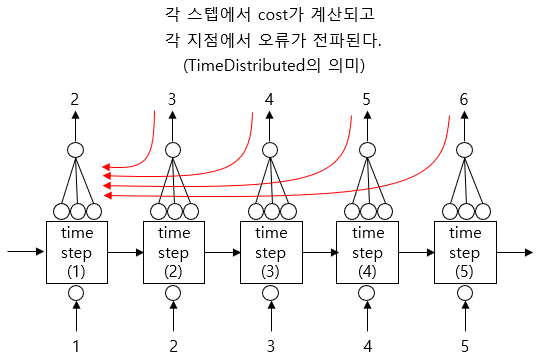

In [188]:
Image('images/withTD.gif', width=500)

<br><br><br><br><br><br><br><br><br>
# 2D Convolution

In [48]:
# 이미지 읽기
Image = PIL.Image.open('images/jennie.jpg')

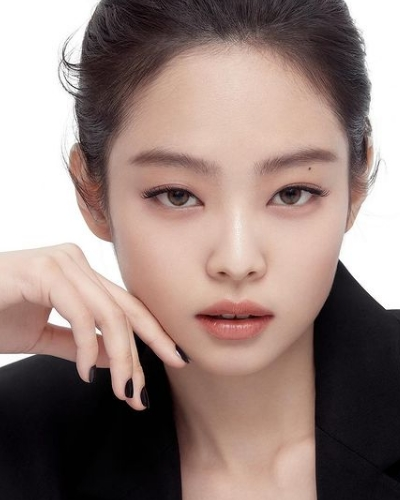

In [49]:
Image

In [50]:
np.array(Image).shape

(500, 400, 3)

In [51]:
np.array(Image)[:5, :5, 1]

array([[255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255]], dtype=uint8)

In [52]:
np.array(Image.resize([224, 224])).shape

(224, 224, 3)

<br><br><br>
# basic 2D convolution & principles
1-unit CNN-2D

In [53]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(1, (3, 3), activation='linear', input_shape=(56, 56, 3,)))
model = Model(inputs=model.input, outputs=model.output)

In [54]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 56, 56, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 54, 54, 1)         28        
                                                                 
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


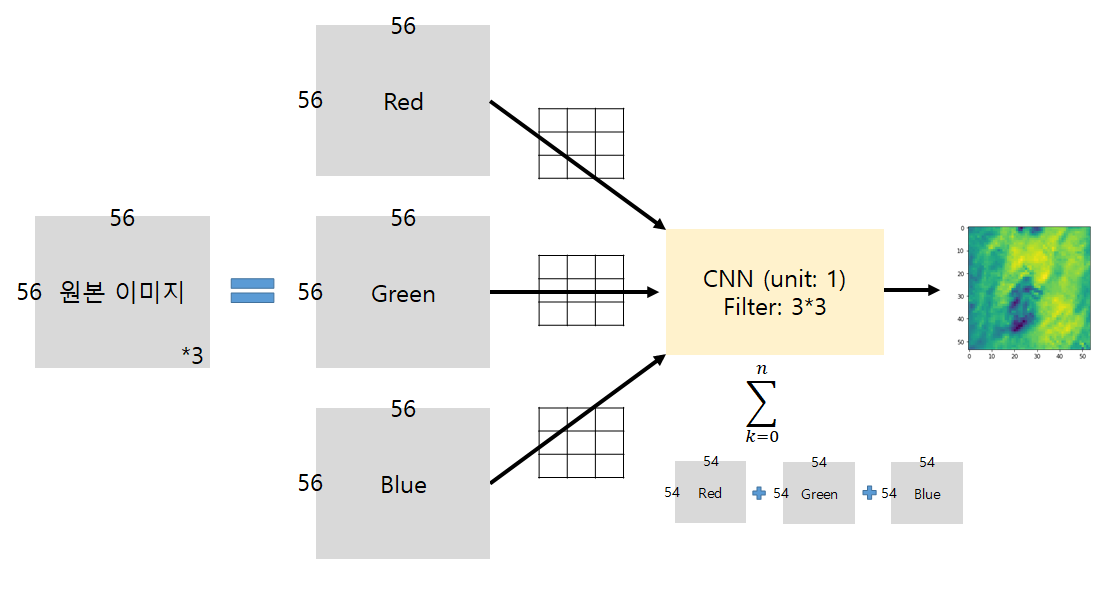

In [192]:
Image('images/CNN.png')

### pooling layer

In [55]:
# Pooling이 있는 모델의 경우
model = models.Sequential()
model.add(tf.keras.layers.Conv2D(5, (3, 3), activation='relu', padding='same', input_shape=(56, 56, 3,)))
model.add(tf.keras.layers.Conv2D(5, (3, 3), activation='relu', padding='same', input_shape=(56, 56, 3,)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model = Model(inputs=model.input, outputs=model.output)

In [56]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1_input (InputLayer)  [(None, 56, 56, 3)]      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 56, 56, 5)         140       
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 5)         230       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 28, 28, 5)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 3920)              0         
                                                                 
 dense_13 (Dense)            (None, 1)                 3921      
                                                           

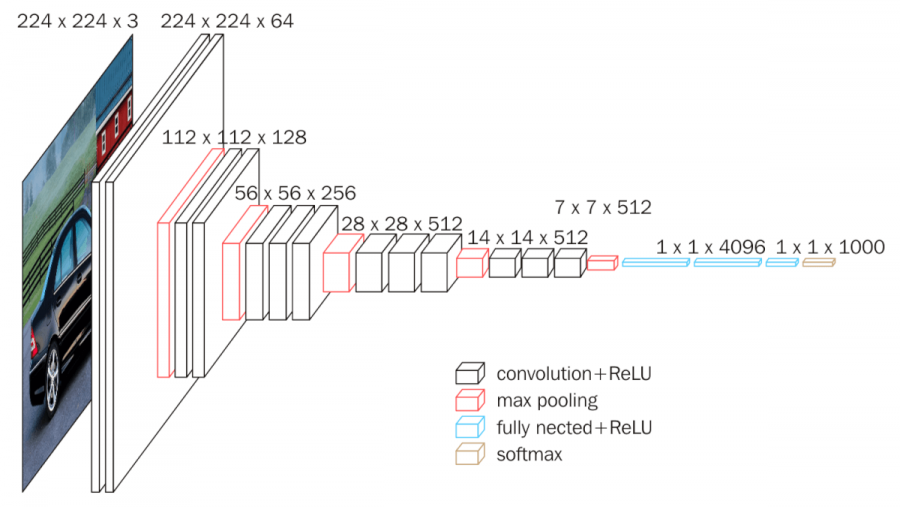

In [221]:
Image('images/VGG.png')

# 1D Convolution

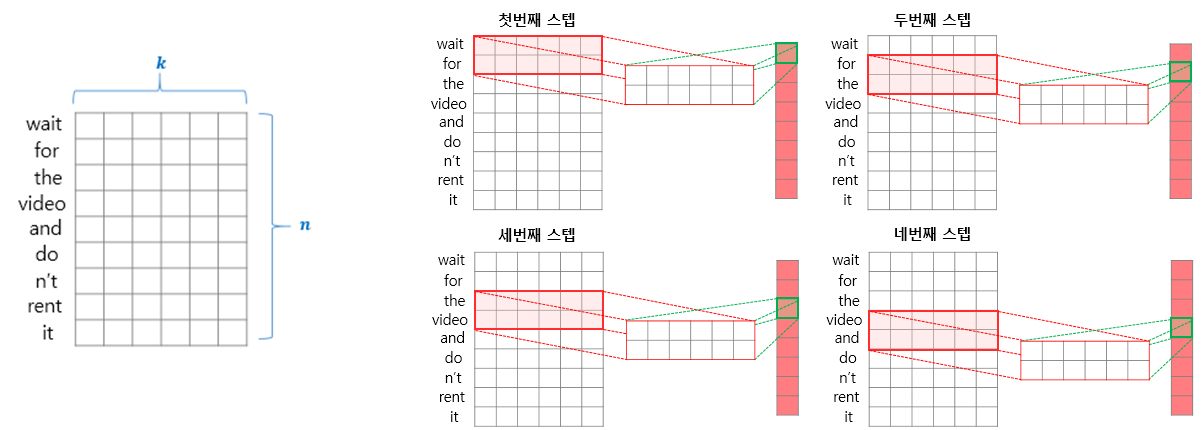

In [213]:
Image('images/CNN1D.png')

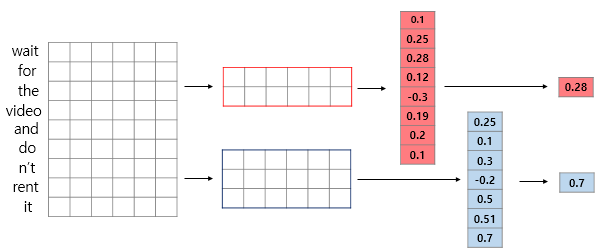

In [223]:
Image('images/MaxPooling.png')

**nFeature: 1**<br>
**Kernel_size = 3**

In [276]:
Data_x = [
    [0.0, 0.0, 0.0, 0.5, 0.8, 1.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
]

Data_y = [ 
    [0.0, 0.0, 0.0, 1.0, 1.0, 1.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
]

In [277]:
TimeRange = 6
nFeatures = 1

In [278]:
num_filters = 1
kernel_size = 3

In [279]:
model = Sequential()
model.add(tf.keras.layers.Conv1D(num_filters, kernel_size, padding='valid', activation='relu', input_shape=( TimeRange, nFeatures,  )  ))

In [280]:
model.summary()

Model: "sequential_59"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 4, 1)              4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [281]:
model.weights

[<tf.Variable 'conv1d_12/kernel:0' shape=(3, 1, 1) dtype=float32, numpy=
 array([[[ 0.8557813 ]],
 
        [[-0.81384325]],
 
        [[ 0.19032073]]], dtype=float32)>,
 <tf.Variable 'conv1d_12/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

In [282]:
model.predict(Data_x)

1/1 [==============================] - 0s 67ms/step


array([[[0.        ],
        [0.09516037],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ]]], dtype=float32)

**nFeature: 2**<br>
**Kernel_size = 3**

In [284]:
Data_x = [
    [[0, 0],[0, 0],[0, 0],[.5,0],[0,.5],[1, 1]],
    [[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0]]
]

Data_y = [ 
    [0.0, 0.0, 0.0, 1.0, 1.0, 1.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
]

In [285]:
TimeRange = 6
nFeatures = 2

In [286]:
num_filters = 1
kernel_size = 3

In [287]:
model = Sequential()
model.add(tf.keras.layers.Conv1D(num_filters, kernel_size, padding='valid', activation='relu', input_shape=( TimeRange, nFeatures,  )  ))

In [288]:
model.summary()

Model: "sequential_60"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_13 (Conv1D)          (None, 4, 1)              7         
                                                                 
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________


In [290]:
model.weights

[<tf.Variable 'conv1d_13/kernel:0' shape=(3, 2, 1) dtype=float32, numpy=
 array([[[-0.35862765],
         [ 0.3236518 ]],
 
        [[ 0.16350299],
         [-0.15686363]],
 
        [[ 0.31304502],
         [-0.4828686 ]]], dtype=float32)>,
 <tf.Variable 'conv1d_13/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

In [294]:
model.predict(Data_x)

1/1 [==============================] - 0s 25ms/step


array([[[0.        ],
        [0.15652251],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ]]], dtype=float32)

In [ ]:
    [[0, 0],[0, 0],[0, 0],[.5,0],[0,.5],[1, 1]],
    [[0, 0],[0, 0],[0, 0],[0, 0],[0, 0],[0, 0]]

In [293]:
model.weights[0][:, :, 0]

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[-0.35862765,  0.3236518 ],
       [ 0.16350299, -0.15686363],
       [ 0.31304502, -0.4828686 ]], dtype=float32)>